In [5]:
import glob
import operator
import numpy as np
import xnetwork as xn
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

In [6]:
# files = ['Adv. Funct. Mater._completedata_110423_bardo_infomap_110423_voting_schema.xnet',
#         'ACS Appl. Mater. Interfaces_completedata_110423_bardo_infomap_110423_voting_schema.xnet',
#         ]

In [7]:
files = ['citing_net_chem. mat._journals_2023-05-25_bardo_infomap.xnet']

In [8]:
len(files)

1

In [9]:
def format_title_journal(name1):
    print(name1)
    name = name1.title()
    name = name.replace('Mater', 'Mat')
    name = name.replace('Acs', 'ACS')
    name = name.replace('Appl. Mat. Interfaces', 'AMI')
    return name

citing


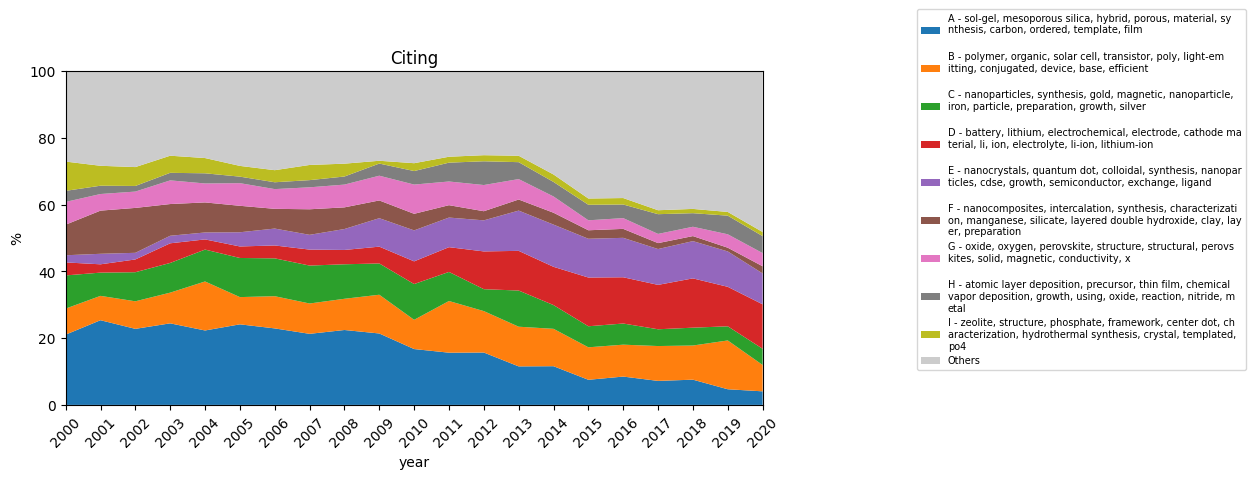

In [10]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from collections import defaultdict

for file in files:
    net_ami = xn.xnet2igraph(file)
    years = sorted(np.unique(net_ami.vs['year']))
    years = list(range(max(2000, int(years[0])), 2021))
    comms_size = defaultdict(lambda:[])

    name_unique = set(net_ami.vs['Cluster Name'])

    X = []
    for year in sorted(years):
        X.append(year)
        vertex_seq = net_ami.vs.select(year_eq=year)
        N = len(vertex_seq)
        subg  = net_ami.subgraph(vertex_seq)

        unique,count = np.unique(subg.vs['Cluster Name'], return_counts=True)
        for u,c in zip(unique, count):
            comms_size[u].append(100*c/N)

        for missing in name_unique - set(unique):
            comms_size[missing].append(0)

    fg = plt.figure(figsize=(17,5))
    ax = fg.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    labels = []
    hists = []
    others = []
    comms_size_sorted = dict(sorted(comms_size.items(), key = lambda x: x[0]))
    count_l = 0
    for label, hist in comms_size_sorted.items():
        count_l += 1
        if count_l > 9:
            others.append(hist)
#             continue
        else:
            labels.append(label[:60] + '\n' + label[60:120] + '\n' + label[120:])
            hists.append(hist)
        
    others = np.sum(others, axis=0)
    hists.append(others)
    labels.append('Others')
    cmap = plt.get_cmap("tab10")
    outer_colors = cmap(np.arange(9))
    
    outer_colors = outer_colors.tolist()
    outer_colors.append([0.8, 0.8, 0.8, 1])
    plt.stackplot(X, *hists, labels=labels, colors=outer_colors)
    plt.margins(0,0)
    plt.xticks(years, rotation=45)
    plt.legend(prop={'size': 7}, bbox_to_anchor=(1.7,1.2))
    plt.ylabel('%')
    plt.xlabel('year')
    plt.title(file)
    plt.tight_layout()
    plt.savefig(file.replace('.xnet', '_dist_020322.pdf'))
    

In [ ]:
# TODO para janela de tempo